In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Collection & Preprocessing

In [51]:
#dataset from kaggle
data= pd.read_csv('/content/emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [52]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [53]:
data.info()
#1" indicates that the email is spam, and "0" indicates that it is not spam

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [54]:
#deleting rows with missing values
data=data.dropna()

# Analysis

spam
0    4360
1    1368
Name: count, dtype: int64


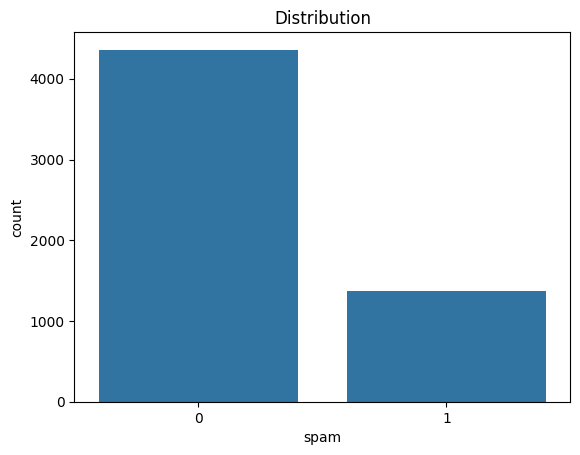

In [59]:
import seaborn as sns

print(data['spam'].value_counts())
sns.countplot(x='spam', data=data)
plt.title('Distribution')
plt.show()

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

data['clean_text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
from wordcloud import WordCloud
from collections import Counter

spam_words = ' '.join(data[data['spam'] == 1]['clean_text'])
legit_words = ' '.join(data[data['spam'] == 0]['clean_text'])



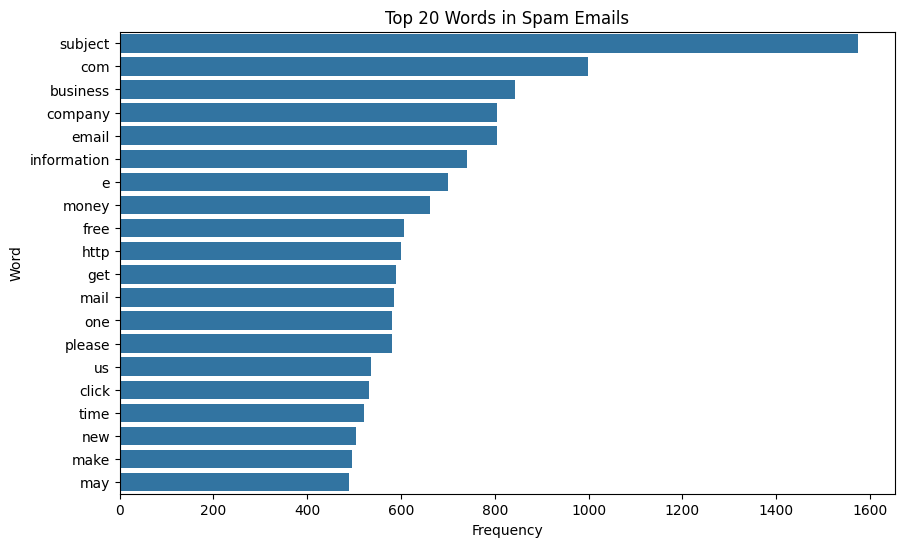

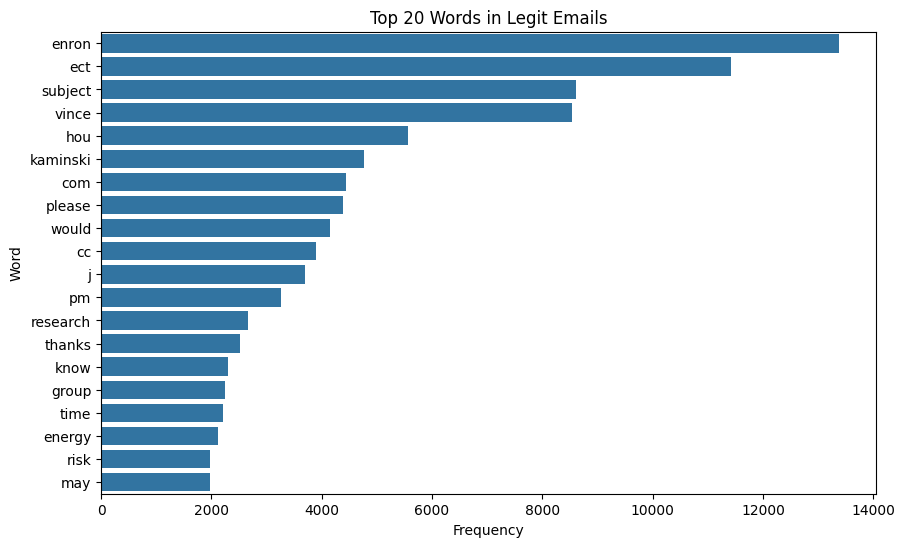

In [62]:
def top_words(words, top_n, title):
    word_freq = Counter(words.split())
    common_words = word_freq.most_common(top_n)
    words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=words_df)
    plt.title(title)
    plt.show()

# top 20
top_words(spam_words, 20, 'Top 20 Words in Spam Emails')
top_words(legit_words, 20, 'Top 20 Words in Legit Emails')


# Model Training

In [17]:
X_train, X_test, y_train, y_test= train_test_split(data['text'],data['spam'], test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

Model Evalution

In [19]:
y_predict= model.predict(X_test_tfidf)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       856
           1       1.00      0.92      0.96       290

    accuracy                           0.98      1146
   macro avg       0.99      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



# Testing

In [22]:
#Testing classification of new emails
# Example email
new_message = "Get a free trial today!"


In [23]:
message_tfidf = tfidf_vectorizer.transform([new_message])
prediction = model.predict(message_tfidf)
if prediction[0] == 1:
  classify_msg= "Spam"
else:
  classify_msg= "text"

In [25]:
print(f"Classification result: {classify_msg}")


Classification result: Spam
